In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
!pip install split-folders

!splitfolders --ratio 0.8 0.1 0.1 -- /content/drive/MyDrive/dataset/potato

Copying files: 2152 files [00:37, 57.12 files/s] 


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.656941   0.61380374 0.6451763 ]
  [0.6539043  0.61076707 0.6421396 ]
  [0.65086764 0.6077304  0.63910294]
  ...
  [0.48834026 0.43735984 0.47265399]
  [0.56786627 0.5168859  0.55218   ]
  [0.5490972  0.49811682 0.5334109 ]]

 [[0.66982704 0.6266898  0.65806234]
  [0.6686883  0.62555104 0.6569236 ]
  [0.66754955 0.6244123  0.65578485]
  ...
  [0.49669114 0.44571075 0.48100486]
  [0.5667275  0.51574713 0.55104125]
  [0.53657085 0.48559046 0.5208846 ]]

 [[0.66693884 0.6238016  0.65517414]
  [0.66731846 0.6241812  0.65555376]
  [0.667698   0.6245608  0.6559333 ]
  ...
  [0.5050421  0.45406166 0.48935577]
  [0.5655888  0.5146084  0.5499025 ]
  [0.5240445  0.4730641  0.50835824]]

 ...

 [[0.56282973 0.5314572  0.5824376 ]
  [0.55395406 0.5225815  0.57356197]
  [0.56161195 0.5302394  0.5812198 ]
  ...
  [0.51186657 0.46088618 0.4961803 ]
  [0.5111074  0.46012703 0.49542114]
  [0.51034826 0.45936784 0.49466196]]

 [[0.56055224 0.5291797  0.5801601 ]
  [0.55357456 0.522202   0.5731824 ]


In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
1721/32

53.78125

In [ ]:
215/32

6.71875

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=53,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 689ms/step - accuracy: 0.4688 - loss: 0.9528 - val_accuracy: 0.4844 - val_loss: 0.8209
Epoch 2/20
 1/53 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.5625 - loss: 0.7933

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5625 - loss: 0.7933 - val_accuracy: 0.5000 - val_loss: 0.8075
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.5811 - loss: 0.7795 - val_accuracy: 0.6719 - val_loss: 0.6858
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6250 - loss: 0.7155 - val_accuracy: 0.7135 - val_loss: 0.6082
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 543ms/step - accuracy: 0.7340 - loss: 0.5727 - val_accuracy: 0.7500 - val_loss: 0.5570
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8750 - loss: 0.3600 - val_accuracy: 0.7344 - val_loss: 0.5678
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 538ms/step - accuracy: 0.7979 - loss: 0.4485 - val_accuracy: 0.9062 - val_loss: 0.3043
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9062 - loss: 0.1979 - val_accuracy: 0.8958 - val_loss: 0.3143
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 774ms/step - accuracy: 0.8628 - loss: 0.3265 - val_accuracy: 0.9167 - val_

In [ ]:
scores = model.evaluate(test_generator)
scores

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.9643 - loss: 0.0650


[0.09057796746492386, 0.9537037014961243]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 53}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

20

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9065866470336914,
 0.7933486700057983,
 0.7378999590873718,
 0.7155019044876099,
 0.5576558113098145]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.484375,
 0.5,
 0.671875,
 0.7135416865348816,
 0.75,
 0.734375,
 0.90625,
 0.8958333134651184,
 0.9166666865348816,
 0.9114583134651184,
 0.9114583134651184,
 0.9427083134651184,
 0.8958333134651184,
 0.8854166865348816,
 0.90625,
 0.921875,
 0.9375,
 0.9427083134651184,
 0.953125,
 0.9375]

In [ ]:
acc

[0.48075783252716064,
 0.5625,
 0.6329188942909241,
 0.625,
 0.7377146482467651,
 0.875,
 0.825932502746582,
 0.90625,
 0.8584961295127869,
 0.875,
 0.9174528121948242,
 0.8799999952316284,
 0.9348726868629456,
 0.875,
 0.9390171766281128,
 1.0,
 0.9473060965538025,
 0.9375,
 0.9585553407669067,
 0.96875]

Text(0.5, 1.0, 'Training and Validation Accuracy')

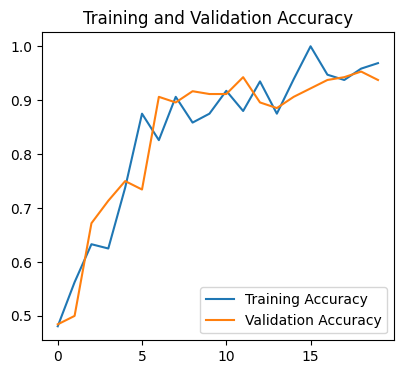

In [ ]:
EPOCHS = 20

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

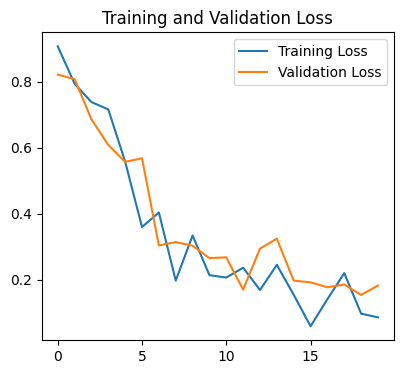

In [ ]:
EPOCHS = 20
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
predicted label: Potato___Early_blight


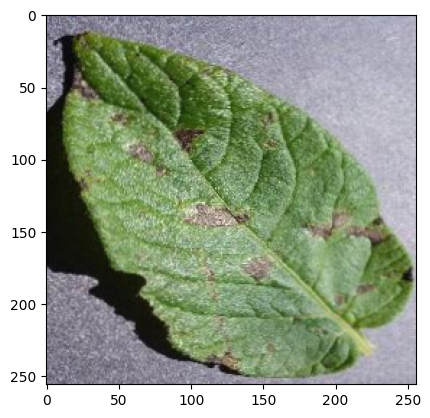

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


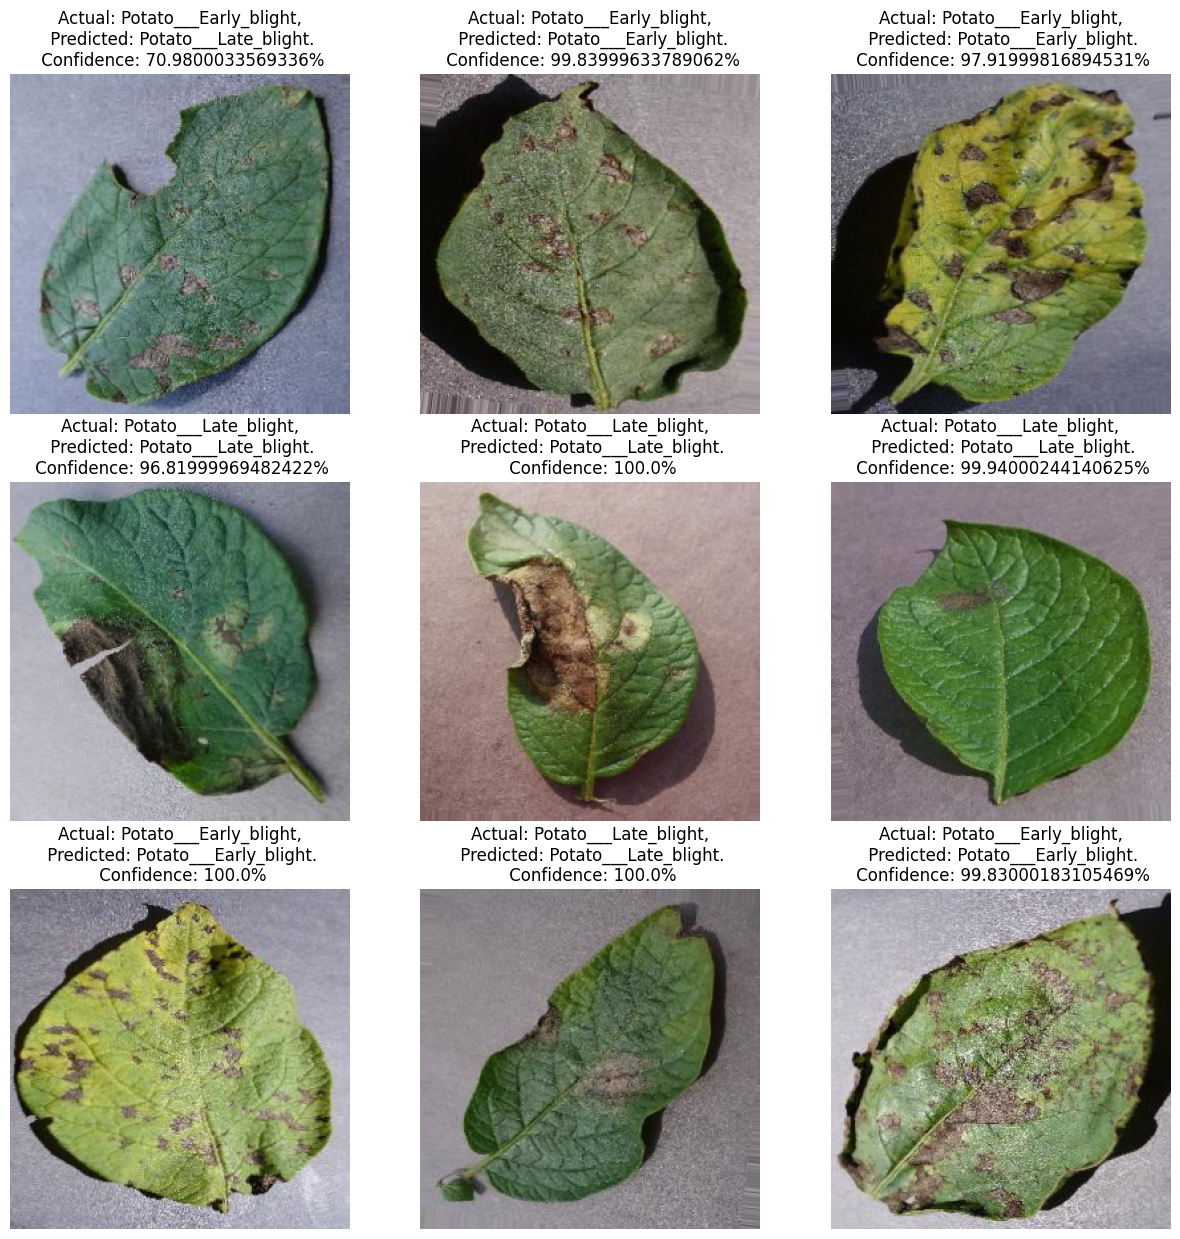

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
model.save("/content/potatoes.keras")

In [ ]:
# In your Colab notebook (after training is complete)
MODEL_PATH_NEW = "/content/potatoes.keras"
model.save(MODEL_PATH_NEW)
print(f"Model successfully saved to {MODEL_PATH_NEW}")

Model successfully saved to /content/potatoes.keras
